In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    else:
        print(f"Directory already exists at {path}")
    return path

directory_path = create_dir("/content/dataset")


In [ ]:
import os
import shutil
from PIL import Image

# Source directories
image_source_dir = "/content/drive/MyDrive/PS1 Train/Images"
label_source_dir = "/content/drive/MyDrive/PS1 Train/Labels"

# Destination directories
destination_dir = "/content/dataset"

# Create destination directories if they don't exist
os.makedirs(os.path.join(destination_dir, "Images"), exist_ok=True)


# Get the list of folders sorted alphabetically in the image source directory
image_folder_names = sorted(os.listdir(image_source_dir))

# Iterate through each folder in the image source directory
for folder_name in image_folder_names:
    image_folder_path = os.path.join(image_source_dir, folder_name)
    label_folder_path = os.path.join(label_source_dir, folder_name)

    # Check if the item in the image source directory is a folder
    if os.path.isdir(image_folder_path):
        # Iterate through each file in the image folder
        for image_file_name in os.listdir(image_folder_path):
            image_file_path = os.path.join(image_folder_path, image_file_name)
            # Check if the item is a file and ends with '_leftImg8bit.png'
            if os.path.isfile(image_file_path) and image_file_name.endswith(('_leftImg8bit.png')):
                # Check if the corresponding label file exists
                corresponding_label_file_name = image_file_name.replace('_leftImg8bit.png', '_gtFine_color.png')
                corresponding_label_file_path = os.path.join(label_folder_path, corresponding_label_file_name)
                if os.path.isfile(corresponding_label_file_path):
                    try:
                        # Open and resize the image
                        image = Image.open(image_file_path)
                        image_resized = image.resize((2048, 1024))  # Resizing image to 2048x1024

                        # Open the corresponding label image
                        label_image = Image.open(corresponding_label_file_path)

                        # Resize the label image to match the height of the resized image
                        label_image_resized = label_image.resize((2048, 1024))  # Resizing label to 2048x1024

                        # Create a new blank image with the width of the resized image and the height of both images
                        merged_image = Image.new('RGB', (image_resized.width + label_image_resized.width, image_resized.height))

                        # Paste the resized image onto the new image
                        merged_image.paste(image_resized, (0, 0))

                        # Paste the resized label image next to the resized image
                        merged_image.paste(label_image_resized, (image_resized.width, 0))

                        # Save the merged image to the destination directory
                        merged_image.save(os.path.join(destination_dir, "Images", image_file_name))

                        # Save the corresponding resized label image to the destination directory
                        label_file_name = corresponding_label_file_name.replace('_gtFine_color.png', '_label.png')
                        label_image_resized.save(os.path.join(destination_dir, "Labels", label_file_name))
                    except Exception as e:
                        continue

In [ ]:
import os

def count_files_in_folder(folder_path):
    try:
        # List all files in the folder
        files = os.listdir(folder_path)
        # Count the number of files
        num_files = len(files)
        return num_files
    except Exception as e:
        print(f"Error counting files in folder: {e}")
        return None

# Example usage:
folder_path = "/content/dataset/Images"
num_files = count_files_in_folder(folder_path)
if num_files is not None:
    print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 1403


In [ ]:
import os
from PIL import Image

# Source directory
source_dir = "/content/dataset/Images"

# Destination directory
destination_dir = "/content/Data"

# Target dimensions
target_width = 512
target_height = 256

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Iterate through each file in the source directory
for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)

    # Check if the item is a file and is an image
    if os.path.isfile(file_path) and any(filename.endswith(ext) for ext in ['.png']):
        try:
            # Open the image
            image = Image.open(file_path)

            # Resize the image
            resized_image = image.resize((target_width, target_height))

            # Save the resized image to the destination directory
            resized_image.save(os.path.join(destination_dir, filename))

            print(f"Resized and saved: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


Resized and saved: aachen_000102_000019_leftImg8bit.png
Resized and saved: erfurt_000108_000019_leftImg8bit.png
Resized and saved: bremen_000307_000019_leftImg8bit.png
Resized and saved: hamburg_000000_065983_leftImg8bit.png
Resized and saved: hamburg_000000_067338_leftImg8bit.png
Resized and saved: cologne_000098_000019_leftImg8bit.png
Resized and saved: aachen_000166_000019_leftImg8bit.png
Resized and saved: bremen_000167_000019_leftImg8bit.png
Resized and saved: bochum_000000_002293_leftImg8bit.png
Resized and saved: aachen_000160_000019_leftImg8bit.png
Resized and saved: dusseldorf_000061_000019_leftImg8bit.png
Resized and saved: bremen_000308_000019_leftImg8bit.png
Resized and saved: dusseldorf_000090_000019_leftImg8bit.png
Resized and saved: bremen_000293_000019_leftImg8bit.png
Resized and saved: bremen_000116_000019_leftImg8bit.png
Resized and saved: aachen_000010_000019_leftImg8bit.png
Resized and saved: bremen_000012_000019_leftImg8bit.png
Resized and saved: aachen_000081_0000

In [ ]:
import os
import random
import shutil

# Set the path to your folder containing images
folder_path = "/content/Data"

# Set the paths for the training and validation folders
train_folder = "/content/Dataset/Train"
val_folder = "/content/Dataset/Validate"

# Create the train and val folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Set the percentage of images to use for validation
validation_split = 0.2  # 20% for validation, adjust as needed

# Get the list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the number of images to use for validation
num_val_images = int(len(image_files) * validation_split)

# Split the image files into training and validation sets
train_images = image_files[num_val_images:]
val_images = image_files[:num_val_images]

# Copy training images to the train folder
for image in train_images:
    src = os.path.join(folder_path, image)
    dst = os.path.join(train_folder, image)
    shutil.copyfile(src, dst)

# Copy validation images to the validation folder
for image in val_images:
    src = os.path.join(folder_path, image)
    dst = os.path.join(val_folder, image)
    shutil.copyfile(src, dst)

print("Splitting complete.")


Splitting complete.


In [ ]:
import os

def count_files(folder_path):
    # Initialize count
    file_count = 0

    # Iterate over files in the folder
    for _, _, files in os.walk(folder_path):
        file_count += len(files)

    return file_count

# Example usage:
folder_path = '/content/Dataset/Validate/'
num_files = count_files(folder_path)
print(f"Number of files in {folder_path}: {num_files}")


Number of files in /content/Dataset/Validate/: 280


MODEL

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from typing import Callable, Union

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from glob import glob
from tqdm import trange
from functools import partial

import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

import cv2
from PIL import Image
import albumentations as A

In [ ]:
#path = r"../input/cityscapes-image-pairs/"

id_map = {
    0: (0, 0, 0), # unlabelled
    1: (111, 74,  0), #static
    2: ( 81,  0, 81), #ground
    3: (128, 64,127), #road
    4: (244, 35,232), #sidewalk
    5: (250,170,160), #parking
    6: (230,150,140), #rail track
    7: (70, 70, 70), #building
    8: (102,102,156), #wall
    9: (190,153,153), #fence
    10: (180,165,180), #guard rail
    11: (150,100,100), #bridge
    12: (150,120, 90), #tunnel
    13: (153,153,153), #pole
    14: (153,153,153), #polegroup
    15: (250,170, 30), #traffic light
    16: (220,220,  0), #traffic sign
    17: (107,142, 35), #vegetation
    18: (152,251,152), #terrain
    19: ( 70,130,180), #sky
    20: (220, 20, 60), #person
    21: (255,  0,  0), #rider
    22: (  0,  0,142), #car
    23: (  0,  0, 70), #truck
    24: (  0, 60,100), #bus
    25: (  0,  0, 90), #caravan
    26: (  0,  0,110), #trailer
    27: (  0, 80,100), #train
    28: (  0,  0,230), #motorcycle
    29: (119, 11, 32), #bicycle
    30: (  0,  0,142) #license plate
}

num_classes = len(id_map.keys())


In [ ]:
BATCH_SIZE = 16
INPUT_SIZE = 256
INPUT_CHANNEL = 3  # 1-grayscale, 3-RGB scale
OUTPUT_MASK_CHANNEL = num_classes  # 31 channels = 31 class per mask

FILTER_NUM = 32  # number of basic filters for the first layer
FILTER_SIZE = 3  # size of the convolutional filter
DOWN_SAMP_SIZE = 2  # size of pooling filters
UP_SAMP_SIZE = 2  # size of upsampling filters

AUTOTUNE = tf.data.AUTOTUNE
EPOCHS = 15

In [ ]:
train_transforms = A.Compose([
                      A.OneOf([A.HueSaturationValue(hue_shift_limit=0.2,
                                                    sat_shift_limit=0.2,
                                                    val_shift_limit=0.2,
                                                    p=0.2),
                              A.RandomBrightnessContrast(brightness_limit=0.2,
                                                         contrast_limit=0.2,
                                                         p=0.9)],p=0.2),
                              A.ToGray(p=0.05),
                      A.OneOf(
                              [A.HorizontalFlip(p=0.5),
                               A.VerticalFlip(p=0.5),
                               A.RandomRotate90(p=0.5),
                               A.Transpose(p=0.5),
                              ], p=0.5),

                      #A.OneOf([
                      #         A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                      #         A.GridDistortion(p=0.5),
                      #         A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
                      #      ], p=0.8),
                      #A.Resize(height=INPUT_SIZE, width=INPUT_SIZE, p=1),
                      #A.Cutout(num_holes=8, max_h_size=10, max_w_size=10, fill_value=0, p=0.1),
                      ], p=1.0)

In [ ]:
def preprocess(path, training=False, labeling=False):
    img = Image.open(path)
    img1 = img.crop((0, 0, 256, 256)).resize((INPUT_SIZE, INPUT_SIZE))
    img2 = img.crop((256, 0, 512, 256)).resize((INPUT_SIZE, INPUT_SIZE))
    img1 = np.array(img1)
    img2 = np.array(img2)
    if labeling:
        mask = np.zeros(shape=(img2.shape[0], img2.shape[1]), dtype = np.uint32)
        for row in range(img2.shape[0]):
            for col in range(img2.shape[1]):
                a = img2[row, col, :]
                final_key = final_d = None
                for key, value in id_map.items():
                    d = np.sum(np.sqrt(pow(a - value, 2)))
                    if final_key == None:
                        final_d, final_key = d, key
                    elif d < final_d:
                        final_d, final_key = d, key
                mask[row, col] = final_key
        mask = np.reshape(mask, (mask.shape[0], mask.shape[1], 1)).astype(np.uint8)
    else:
        mask = img2
    if training:
        sample = train_transforms(**{"image": img1, "mask": mask})
        img1, mask = sample["image"], sample["mask"]
    del img2
    img1 = img1 / 255.
    return img1, mask


def preprocess(path):
    img = Image.open(path)
    img1 = img.crop((0, 0, 256, 256)).resize((INPUT_SIZE, INPUT_SIZE))
    img2 = img.crop((256, 0, 512, 256)).resize((INPUT_SIZE, INPUT_SIZE))
    img1 = np.array(img1).astype(np.float32)
    img2 = np.array(img2).astype(np.float32)
    return img1, img2

def aug_fn(image, mask):
    data = {"image":image, "mask": mask}
    aug_data = train_transforms(**data)
    aug_img = aug_data["image"]
    aug_mask = aug_data["mask"]
    aug_img = tf.cast(aug_img/255.0, tf.float32)
    aug_mask = tf.cast(aug_mask/255.0, tf.float32)
    return aug_img, aug_mask

def process_data(image, mask):
    aug_img, aug_mask = tf.numpy_function(func=aug_fn, inp=[image, mask], Tout=[tf.float32, tf.float32])
    return aug_img, aug_mask

def valid_aug(image, mask):
    aug_img = tf.cast(image/255.0, tf.float32)
    aug_mask = tf.cast(mask/255.0, tf.float32)
    return aug_img, aug_mask

In [ ]:
import os
import numpy as np

train_raw_images = glob("/content/Dataset/Train/*.png")
val_raw_images = glob("/content/Dataset/Validate/*.png")

x_train_images = np.zeros((len(train_raw_images), INPUT_SIZE, INPUT_SIZE, 3), dtype=np.float32)
x_train_masks = np.zeros((len(train_raw_images), INPUT_SIZE, INPUT_SIZE, 3), dtype=np.float32)

x_valid_images = np.zeros((len(val_raw_images), INPUT_SIZE, INPUT_SIZE, 3), dtype=np.float32)
x_valid_masks = np.zeros((len(val_raw_images), INPUT_SIZE, INPUT_SIZE, 3), dtype=np.float32)

for i in trange(len(train_raw_images)):
    image, mask = preprocess(train_raw_images[i])
    x_train_images[i, ...] = image
    x_train_masks[i, ...] = mask

for i in trange(len(val_raw_images)):
    image, mask = preprocess(val_raw_images[i])
    x_valid_images[i, ...] = image
    x_valid_masks[i, ...] = mask

100%|██████████| 280/280 [00:02<00:00, 138.88it/s]


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_images, x_train_masks)).map(partial(process_data), num_parallel_calls=AUTOTUNE).cache().shuffle(len(x_train_images)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid_images, x_valid_masks)).map(lambda x,y: (valid_aug(x,y))).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [ ]:
def multiclass_dice_loss() -> Callable[[tf.Tensor, tf.Tensor], tf.Tensor]:
    """
    y_true: [batch, height, width, 1]
    y_pred: [batch, height, width, num_classes]
    """
    def loss(y_true: tf.Tensor, y_pred: tf.Tensor, smooth: float = 1e-7) -> tf.Tensor:
        y_true = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=num_classes)[...,1:])  # ignores 0 index
        y_pred = K.flatten(y_pred[..., 1:])

        numerator = K.sum(y_true * y_pred, axis=-1)
        denominator = K.sum(y_true + y_pred, axis=-1)
        dice_coef = K.mean((2. * (numerator + smooth) / (denominator + smooth)))

        return 1 - dice_coef

    return loss

def dice_coeff_loss(y_true, y_pred):

    def dice_coeff(y_true, y_pred, smooth=1e-7):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

    return dice_coeff

def dice_coeff(y_true, y_pred, smooth=1e-7):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

MODEL

In [ ]:
def double_conv_layer(x, filter_size, size, dropout, batch_norm=False):  # basic convolutional block
    axis = 3
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=axis)(conv)
    conv = layers.Activation('relu')(conv)
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=axis)(conv)
    conv = layers.Activation('relu')(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=axis)(shortcut)

    res_path = layers.add([shortcut, conv])
    return res_path

In [ ]:
def gating_signal(input, out_size, batch_norm=False):  # get previous prepred activation maps
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def expend_as(tensor, rep):  # align to channel size with repeat function
     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

def attention_block(x, gating, inter_shape):  # compute attention with g_conv(=previous) and c_conv (=current) cnn-block outputs
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = expend_as(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn

def Attention_ResUNet(dropout_rate=0.0, batch_norm=True):  # full Attention-UNET model
    # dimension of the image depth
    inputs = layers.Input((INPUT_SIZE, INPUT_SIZE, INPUT_CHANNEL), dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = double_conv_layer(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)

    # DownRes 2
    conv_64 = double_conv_layer(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)

    # DownRes 3
    conv_32 = double_conv_layer(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)

    # DownRes 4
    conv_16 = double_conv_layer(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)

    # DownRes 5, convolution only
    conv_8 = double_conv_layer(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = double_conv_layer(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)

    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = double_conv_layer(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)

    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = double_conv_layer(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)

    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = double_conv_layer(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # conv_final = layers.Conv2D(OUTPUT_MASK_CHANNEL, kernel_size=(1,1), activation="softmax")(up_conv_128) # or from_logits tr
    # conv_final = layers.Conv2D(3, kernel_size=(1,1), activation="sigmoid")(up_conv_128)
    conv_final = layers.Conv2D(32, kernel_size=(1,1))(up_conv_128)  # OUTPUT_MASK_CHANNEL
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('relu')(conv_final)  # на самом деле сеть дает такие же или даже лучше результаты, если убрать этот блок (conv-batch-relu)

    conv_final = layers.Conv2D(3, kernel_size=(1,1), activation="sigmoid")(conv_final)

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model

In [ ]:
class UpdatedMeanIoU(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes=None, name=None, dtype=None):
        super().__init__(num_classes=num_classes, name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        if y_true.shape.ndims is not None and y_true.shape.ndims > 1:
            y_true = tf.math.argmax(y_true, axis=-1)
        return super().update_state(y_true, y_pred, sample_weight)


class VizCallback(tf.keras.callbacks.Callback):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def on_epoch_end(self, epoch, logs=None):
        file_path = val_raw_images[np.random.randint(len(val_raw_images))]
        img, mask = preprocess(file_path)
        img = np.array(img)[np.newaxis, ...] / 255.
        pred = model.predict(img)[0]
        # y_pred = tf.math.argmax(pred, axis=-1)  # при таргете [batch, height, width, num_classes]
        y_pred = np.array(pred)
        # y_pred = np.reshape(y_pred, (INPUT_SIZE, INPUT_SIZE))
        fig, axes = plt.subplots(nrows=1, ncols=3)
        axes[0].imshow(img.squeeze())
        axes[0].set_title("Image")
        axes[1].imshow(mask/255.)
        axes[1].set_title("Original Mask")
        axes[2].imshow(y_pred)
        axes[2].set_title("Predicted Mask")
        plt.tight_layout()
        plt.show()

In [ ]:
model = Attention_ResUNet()
model.compile(optimizer="adam", loss="binary_crossentropy")

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define ModelCheckpoint callback with save_best_only=True
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5',
                                      monitor='val_loss',
                                      save_best_only=True)

# Define your custom callback (assuming VizCallback is your custom callback)
viz_callback = VizCallback()

# Define other callbacks
reduce_lr_callback = ReduceLROnPlateau(patience=3)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Combine all callbacks
callbacks = [checkpoint_callback, reduce_lr_callback, early_stopping_callback, viz_callback]


Epoch 1/15
1/1 [==============================] - 5s 5s/step


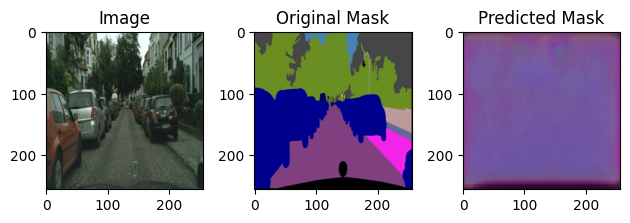

71/71 [==============================] - 138s 1s/step - loss: 0.6303 - val_loss: 0.6677 - lr: 0.0010
Epoch 2/15
1/1 [==============================] - 0s 25ms/step


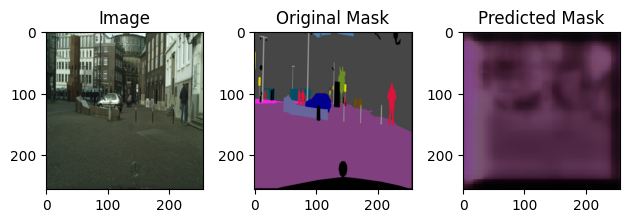

71/71 [==============================] - 48s 671ms/step - loss: 0.6067 - val_loss: 0.6778 - lr: 0.0010
Epoch 3/15
1/1 [==============================] - 0s 25ms/step


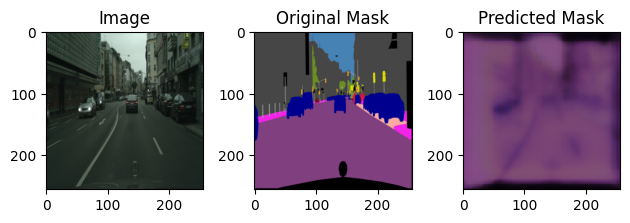

71/71 [==============================] - 50s 700ms/step - loss: 0.6014 - val_loss: 0.6492 - lr: 0.0010
Epoch 4/15
1/1 [==============================] - 0s 25ms/step


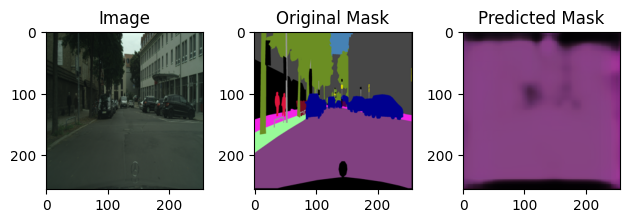

71/71 [==============================] - 48s 676ms/step - loss: 0.5978 - val_loss: 0.6662 - lr: 0.0010
Epoch 5/15
1/1 [==============================] - 0s 25ms/step


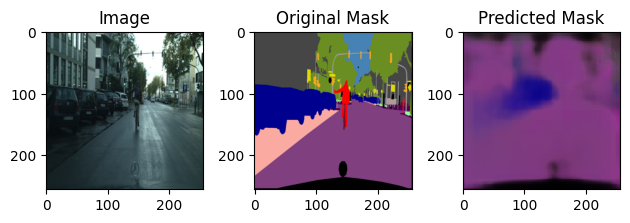

71/71 [==============================] - 49s 687ms/step - loss: 0.5965 - val_loss: 0.6565 - lr: 0.0010
Epoch 6/15
1/1 [==============================] - 0s 27ms/step


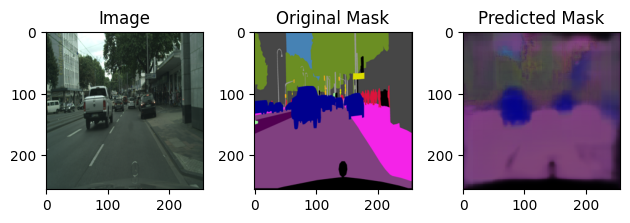

71/71 [==============================] - 51s 713ms/step - loss: 0.5927 - val_loss: 0.6179 - lr: 0.0010
Epoch 7/15
1/1 [==============================] - 0s 25ms/step


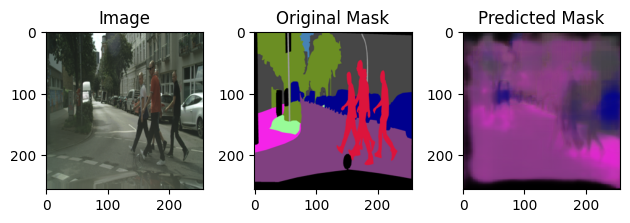

71/71 [==============================] - 49s 694ms/step - loss: 0.5911 - val_loss: 0.6106 - lr: 0.0010
Epoch 8/15
1/1 [==============================] - 0s 42ms/step


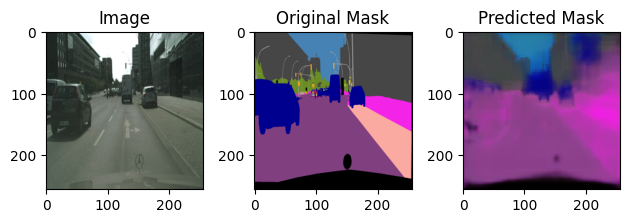

71/71 [==============================] - 50s 711ms/step - loss: 0.5888 - val_loss: 0.6081 - lr: 0.0010
Epoch 9/15
1/1 [==============================] - 0s 43ms/step


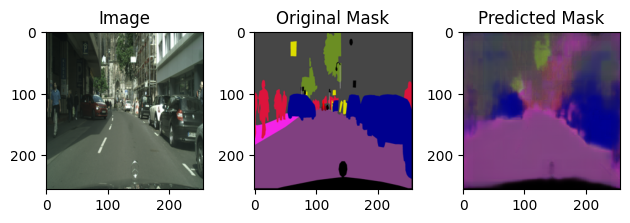

71/71 [==============================] - 53s 739ms/step - loss: 0.5877 - val_loss: 0.5887 - lr: 0.0010
Epoch 10/15
1/1 [==============================] - 0s 37ms/step


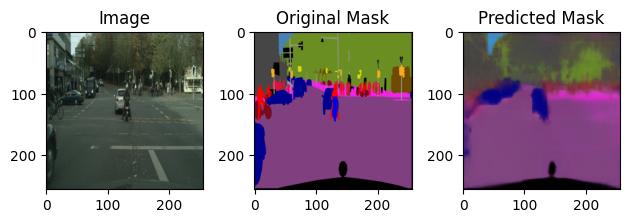

71/71 [==============================] - 49s 696ms/step - loss: 0.5855 - val_loss: 0.5718 - lr: 0.0010
Epoch 11/15
1/1 [==============================] - 0s 25ms/step


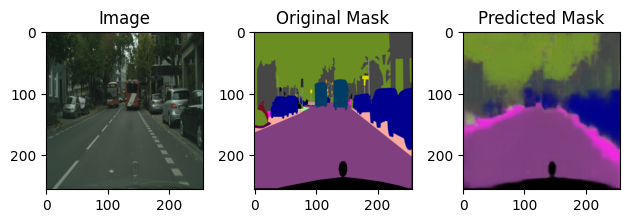

71/71 [==============================] - 49s 693ms/step - loss: 0.5843 - val_loss: 0.5784 - lr: 0.0010
Epoch 12/15
1/1 [==============================] - 0s 28ms/step


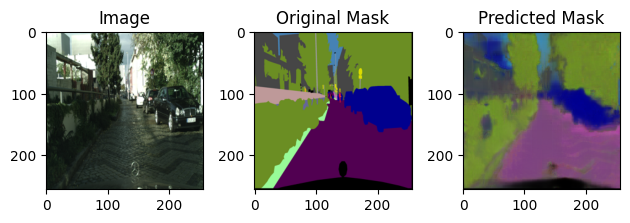

71/71 [==============================] - 49s 694ms/step - loss: 0.5828 - val_loss: 0.5665 - lr: 0.0010
Epoch 13/15
1/1 [==============================] - 0s 38ms/step


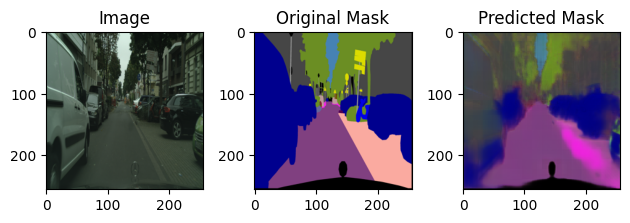

71/71 [==============================] - 49s 696ms/step - loss: 0.5819 - val_loss: 0.5698 - lr: 0.0010
Epoch 14/15
1/1 [==============================] - 0s 34ms/step


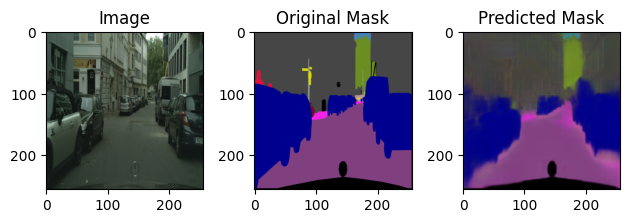

71/71 [==============================] - 50s 702ms/step - loss: 0.5804 - val_loss: 0.5642 - lr: 0.0010
Epoch 15/15
1/1 [==============================] - 0s 43ms/step


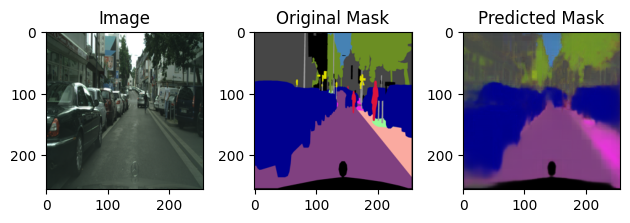

71/71 [==============================] - 50s 698ms/step - loss: 0.5787 - val_loss: 0.5626 - lr: 0.0010


In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=valid_ds, callbacks=callbacks, verbose=1)

In [ ]:
# After training, save the entire model
model.save("checkpoint_after_15_epochs.h5")


In [ ]:
import os
import shutil

# Source directory containing folders with PNG files
source_dir = "/content/drive/MyDrive/PS1Test/Images"

# Destination directory
destination_dir = "/content/dataset/Test"

# Check if the destination directory exists; if not, create it
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
    print(f"Destination directory '{destination_dir}' created.")

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)
    # Check if the item in the source directory is a folder
    if os.path.isdir(folder_path):
        # Iterate through each file in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Check if the item is a file
            if os.path.isfile(file_path):
                try:
                    # Transfer the file to the destination directory
                    shutil.copy(file_path, destination_dir)
                except Exception as e:
                    print(f"Error copying file '{file_path}': {e}")



In [ ]:
# Count the number of files in the destination directory
num_files = len(os.listdir(destination_dir))
print(f"Number of files transferred to the 'Test' directory: {num_files}")


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define constants for input size and channel configurations
INPUT_SIZE = 256
INPUT_CHANNEL = 3

# Define the directory path where the test images are located
test_data_dir = "/content/dataset/Test"

# List all files in the test data directory
test_files = os.listdir(test_data_dir)


NotADirectoryError: [Errno 20] Not a directory: '/content/dataset/Test'

In [ ]:
model_path = "/content/checkpoint_after_15_epochs.h5"
model = load_model(model_path)

# Define a function to preprocess a single test image
def preprocess_test_image(image_path):
    try:
        # Open the image
        img = Image.open(image_path)
        # Resize the image to match the input size of your model
        img = img.resize((INPUT_SIZE, INPUT_SIZE))
        # Convert the image to numpy array and normalize pixel values
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None


In [ ]:

# Define a function to predict masks for test images
def predict_masks(test_images):
    try:
        # Predict masks for test images using the pre-trained model
        predicted_masks = model.predict(test_images)
        return predicted_masks
    except Exception as e:
        print(f"Error predicting masks: {e}")
        return None


In [ ]:
# Preprocess and predict masks for each test image
for image_name in test_files:
    # Construct the full path to the test image
    image_path = os.path.join(test_data_dir, image_name)
    # Preprocess the test image
    preprocessed_image = preprocess_test_image(image_path)
    if preprocessed_image is not None:
        # Reshape the preprocessed image to match model input shape
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
        # Predict mask for the preprocessed test image
        predicted_mask = predict_masks(preprocessed_image)
        if predicted_mask is not None:
            # Visualize the original test image and predicted mask
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(preprocessed_image[0])
            plt.title("Original Image")
            plt.axis("off")
            plt.subplot(1, 2, 2)
            plt.imshow(predicted_mask[0], cmap="gray")
            plt.title("Predicted Mask")
            plt.axis("off")
            plt.show()

NameError: name 'test_files' is not defined

In [ ]:

# Create a directory to save the predicted masks
output_dir = "/content/predicted_masks"
os.makedirs(output_dir, exist_ok=True)

# Define a function to preprocess a single test image
def preprocess_test_image(image_path):
    try:
        # Open the image
        img = Image.open(image_path)
        # Resize the image to match the input size of your model
        img = img.resize((INPUT_SIZE, INPUT_SIZE))
        # Convert the image to numpy array and normalize pixel values
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Iterate through test images
for image_name in os.listdir(test_data_dir):
    # Preprocess the test image
    image_path = os.path.join(test_data_dir, image_name)
    img = preprocess_test_image(image_path)
    if img is None:
        continue

    # Predict the mask using the model
    predicted_mask = model.predict(img[np.newaxis, ...])[0]

    # Convert the predicted mask to an image
    predicted_mask_image = Image.fromarray((predicted_mask * 255).astype(np.uint8))

    # Save the predicted mask image to the output directory
    output_path = os.path.join(output_dir, image_name.replace(".png", "_mask.png"))
    predicted_mask_image.save(output_path)

print("Predicted masks saved in:", output_dir)

1/1 [==============================] - 0s 29ms/step
Predicted masks saved in: /content/predicted_masks


In [ ]:
# Evaluate the model on the training dataset
training_history = model.evaluate(train_ds)

print("Training Loss:", training_history)


71/71 [==============================] - 14s 169ms/step - loss: 0.5847
Training Loss: 0.5847474336624146


In [ ]:

# Evaluate the model on the validation dataset
validation_history = model.evaluate(valid_ds)

print("Validation Loss:", validation_history)

18/18 [==============================] - 3s 162ms/step - loss: 0.5626
Validation Loss: 0.5625757575035095


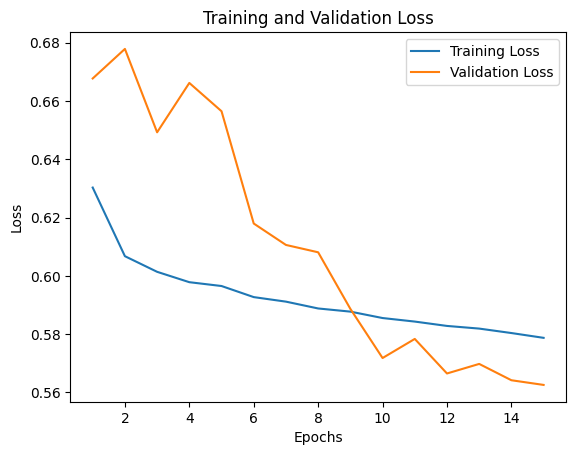

In [ ]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss curves
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()